In [2]:
import numpy as np
import pandas as pd

Task 1

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на маллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.
Есть ли связь между жёсткостью воды и средней годовой смертностью? Посчитайте значение коэффициента корреляции Пирсона между этими признаками, округлите его до четырёх знаков после десятичной точки.

In [6]:
task1Data = pd.read_csv("water.txt", sep="\t")
task1Data.corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


Task 2

В предыдущей задаче посчитайте значение коэффициента корреляции Спирмена между средней годовой смертностью и жёсткостью воды. Округлите до четырёх знаков после десятичной точки.

In [13]:
from scipy.stats import spearmanr
task2Data = pd.read_csv("water.txt", sep="\t")
spearmanr(task2Data.mortality.values,task2Data.hardness.values)

SpearmanrResult(correlation=-0.63166461891665016, pvalue=4.79546153722838e-08)

Task 3

Сохраняется ли связь между признаками, если разбить выборку на северные и южные города? Посчитайте значения корреляции Пирсона между средней годовой смертностью и жёсткостью воды в каждой из двух подвыборок, введите наименьшее по модулю из двух значений, округлив его до четырёх знаков после десятичной точки.

In [20]:
task3Data = pd.read_csv("water.txt", sep="\t")
#South, North
southPivot = task3Data[task3Data.location =="South"].corr()
northPivot = task3Data[task3Data.location =="North"].corr()

print southPivot
print northPivot

           mortality  hardness
mortality   1.000000 -0.602153
hardness   -0.602153  1.000000
           mortality  hardness
mortality   1.000000 -0.368598
hardness   -0.368598  1.000000


Task 4

Среди респондентов General Social Survey 2014 года хотя бы раз в месяц проводят вечер в баре 203 женщины и 239 мужчин; реже, чем раз в месяц, это делают 718 женщин и 515 мужчин.

Посчитайте значение коэффициента корреляции Мэтьюса между полом и частотой похода в бары. Округлите значение до трёх знаков после десятичной точки.
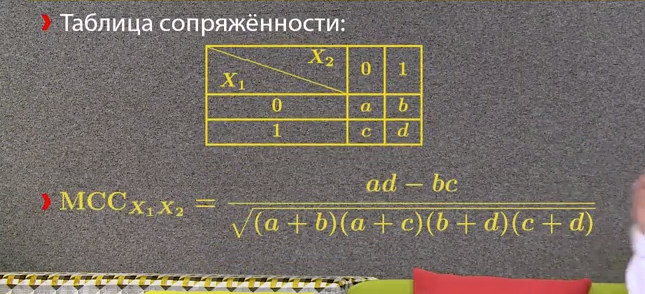

In [25]:
from math import sqrt
#203 женщины и 239 мужчин
#718 женщин и 515 мужчин
a = 203
b = 239
c = 718
d = 515
def MetCorrelation(a, b, c, d):
    return (a*d-b*c) / sqrt((a+b)*(a+c)*(b+d)*(c+d))
print MetCorrelation(a, b, c, d)

-0.109002374587


Task 5

В предыдущей задаче проверьте, значимо ли коэффициент корреляции Мэтьюса отличается от нуля. Посчитайте достигаемый уровень значимости; используйте функцию scipy.stats.chi2_contingency. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [28]:
from scipy.stats import chi2_contingency

obs = np.array([[a, b], [c, d]])
chi2, p, dof, ex = chi2_contingency(obs)
print p

1.05589870066e-05


Task 6

В предыдущей задаче давайте попробуем ответить на немного другой вопрос: отличаются ли доля мужчин и доля женщин, относительно часто проводящих вечера в баре? Постройте 95% доверительный интервал для разности долей, вычитая долю женщин из доли мужчин. Чему равна его нижняя граница? Округлите до четырёх знаков после десятичной точки.

In [31]:
import scipy

def proportions_diff_confint_ind(alpha = 0.05):    
    z = scipy.stats.norm.ppf(1 - alpha / 2.)
    result2_1 = 203
    result2_0 = 718

    result1_1 = 239
    result1_0 = 515
    
    count1 = result1_1 + result1_0
    count2 = result2_1 + result2_0
    p1 = float(result1_1) / count1
    p2 = float(result2_1) / count2
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ count1 + p2 * (1 - p2)/ count2)
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ count2 + p2 * (1 - p2)/ count2)
    
    return (left_boundary, right_boundary)

#203 женщины и 239 мужчин
#718 женщин и 515 мужчин
print proportions_diff_confint_ind()

(0.053905233215813156, 0.13680932687358488)


Task 7

Проверьте гипотезу о равенстве долей любителей часто проводить вечера в баре среди мужчин и женщин. Посчитайте достигаемый уровень значимости, используя двустороннюю альтернативу. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).



In [33]:
def proportions_diff_z_stat_ind():
    
    result2_1 = 203
    result2_0 = 718

    result1_1 = 239
    result1_0 = 515
    count1 = result1_1 + result1_0
    count2 = result2_1 + result2_0
    n1 = count1
    n2 = count2

    p1 = float(result1_1) / n1
    p2 = float(result2_1) / n2 
    P = float(p1*n1 + p2*n2) / (n1 + n2)
    
    return (p1 - p2) / np.sqrt(P * (1 - P) * (1. / n1 + 1. / n2))
def proportions_diff_z_test(z_stat, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    if alternative == 'two-sided':
        return 2 * (1 - scipy.stats.norm.cdf(np.abs(z_stat)))
    
    if alternative == 'less':
        return scipy.stats.norm.cdf(z_stat)

    if alternative == 'greater':
        return 1 - scipy.stats.norm.cdf(z_stat)

proportions_diff_z_test(proportions_diff_z_stat_ind())

8.1534530895766011e-06

Task 8

Посмотрим на данные General Social Survey 2014 года и проанализируем, как связаны ответы на вопросы "Счастливы ли вы?" и "Довольны ли вы вашим финансовым положением?"
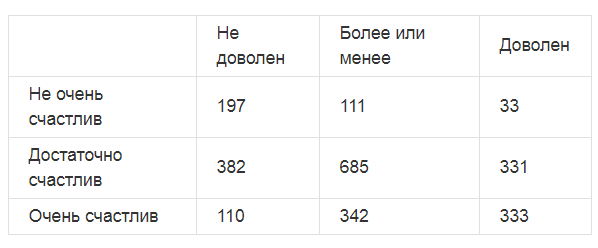

Не доволен	Более или менее	Доволен
Не очень счастлив	197	111	33
Достаточно счастлив	382	685	331
Очень счастлив	110	342	333

Чему равно значение статистики хи-квадрат для этой таблицы сопряжённости? Округлите ответ до четырёх знаков после десятичной точки.

In [34]:
obs8 = np.array([[197, 111, 33], [382, 685, 331], [110, 342, 333]])
chi2, p, dof, ex = chi2_contingency(obs8)
print chi2

293.683110397


Task 9

На данных из предыдущего вопроса посчитайте значение достигаемого уровня значимости. Введите номер первой значащей цифры (например, если вы получили 5.5×10−8, нужно ввести 8).

In [35]:
obs8 = np.array([[197, 111, 33], [382, 685, 331], [110, 342, 333]])
chi2, p, dof, ex = chi2_contingency(obs8)
print p

2.49642995801e-62


Question 10

Чему в предыдущей задаче равно значение коэффициента V Крамера для рассматриваемых признаков? Округлите ответ до четырёх знаков после десятичной точки.

In [ ]:
obs8 = np.array([[197, 111, 33], [382, 685, 331], [110, 342, 333]])
chi2, p, dof, ex = chi2_contingency(obs8)
print chi2